In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time


2025-01-13 13:00:07.430373: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 13:00:07.433800: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-13 13:00:07.445129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736769607.464327   53461 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736769607.469608   53461 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-13 13:00:07.488777: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Load Data

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
print(housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
# Print data type
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target 

print(data.shape, '\n')
print(data.columns, '\n')

housing.frame.head()

(20640, 9) 

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object') 



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
#Overview of the variables

print(data.describe(), '\n \n')

#Look for null data
print('Null Data per label: \n')
print(data.isnull().sum())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

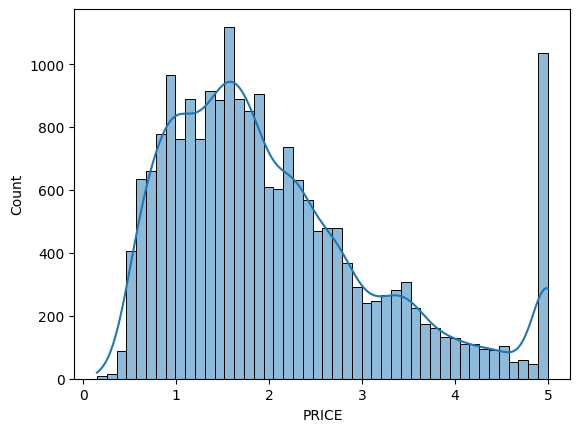

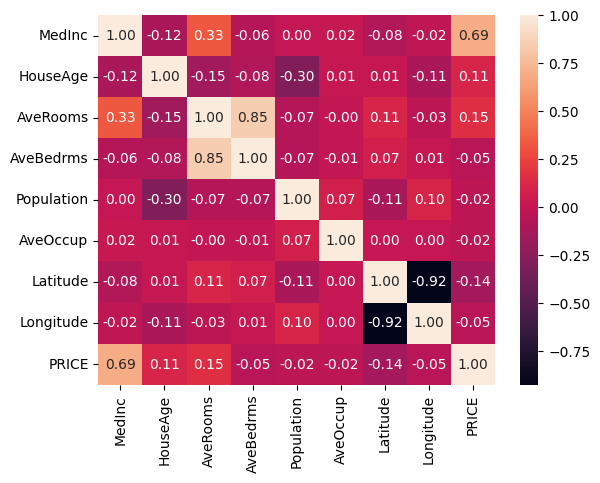

In [5]:
#Data Visualization

sns.histplot(data['PRICE'], kde=True)
plt.show()

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


In [6]:
# Split into input features and target

X = data[housing.feature_names]
y = data['PRICE'].values.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalize features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

y_train_normalized = scaler_y.fit_transform(y_train)
y_test_normalized = scaler_y.transform(y_test)


Epoch 1/50


/home/giov_armando/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-13 13:00:10.671580: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


523/523 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7952 - mae: 0.7067 - val_loss: 0.4854 - val_mae: 0.5158
Epoch 2/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4417 - mae: 0.4930 - val_loss: 0.4098 - val_mae: 0.4611
Epoch 3/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3864 - mae: 0.4535 - val_loss: 0.3746 - val_mae: 0.4394
Epoch 4/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3532 - mae: 0.4329 - val_loss: 0.3539 - val_mae: 0.4283
Epoch 5/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3336 - mae: 0.4133 - val_loss: 0.3419 - val_mae: 0.4181
Epoch 6/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2979 - mae: 0.3940 - val_loss: 0.3339 - val_mae: 0.4126
Epoch 7/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2984 - mae: 0.3909 - val_loss: 0.3278 - val_mae: 0.4087
Epoch 8/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3027 - mae: 0.3906 - val_loss: 0.3208 - val_mae: 0.4056
Epoch 9/50
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2872 

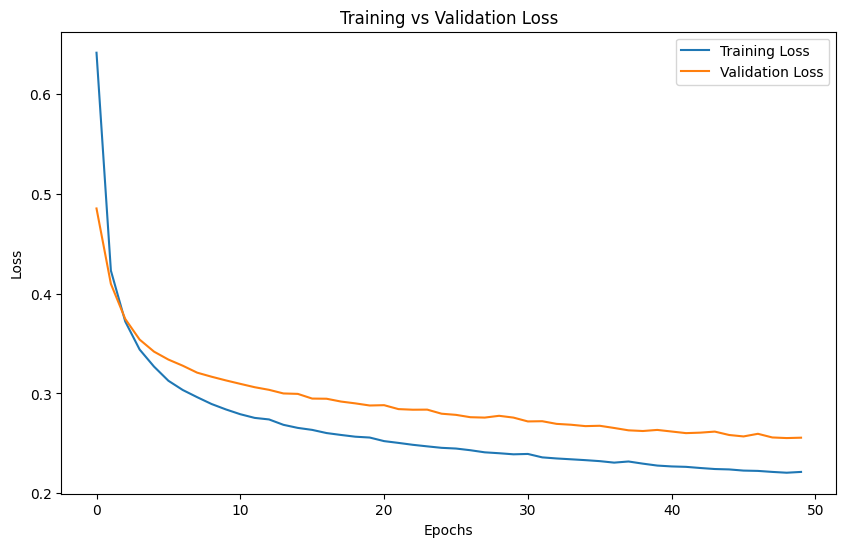

In [7]:
# Benchmark Neural Network

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])


history = model.fit(
    X_train_normalized, y_train_normalized,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test_normalized, y_test_normalized, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Plotting the loss function (training and validation)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training model with lr=0.0001, neurons=64, dropout=0, activation=relu, batch_size=32, epochs=10
Training model with lr=0.0001, neurons=64, dropout=0, activation=relu, batch_size=32, epochs=20
Training model with lr=0.0001, neurons=64, dropout=0, activation=relu, batch_size=32, epochs=50
Training model with lr=0.0001, neurons=64, dropout=0, activation=relu, batch_size=32, epochs=100
Training model with lr=0.0001, neurons=64, dropout=0, activation=relu, batch_size=64, epochs=10
Training model with lr=0.0001, neurons=64, dropout=0, activation=relu, batch_size=64, epochs=20
Training model with lr=0.0001, neurons=64, dropout=0, activation=relu, batch_size=64, epochs=50
Training model with lr=0.0001, neurons=64, dropout=0, activation=relu, batch_size=64, epochs=100
Training model with lr=0.0001, neurons=64, dropout=0, activation=tanh, batch_size=32, epochs=10
Training model with lr=0.0001, neurons=64, dropout=0, activation=tanh, batch_size=32, epochs=20
Training model with lr=0.0001, neurons

Training model with lr=0.0001, neurons=128, dropout=0, activation=relu, batch_size=64, epochs=10
Training model with lr=0.0001, neurons=128, dropout=0, activation=relu, batch_size=64, epochs=20
Training model with lr=0.0001, neurons=128, dropout=0, activation=relu, batch_size=64, epochs=50
Training model with lr=0.0001, neurons=128, dropout=0, activation=relu, batch_size=64, epochs=100
Training model with lr=0.0001, neurons=128, dropout=0, activation=tanh, batch_size=32, epochs=10
Training model with lr=0.0001, neurons=128, dropout=0, activation=tanh, batch_size=32, epochs=20
Training model with lr=0.0001, neurons=128, dropout=0, activation=tanh, batch_size=32, epochs=50
Training model with lr=0.0001, neurons=128, dropout=0, activation=tanh, batch_size=32, epochs=100
Training model with lr=0.0001, neurons=128, dropout=0, activation=tanh, batch_size=64, epochs=10
Training model with lr=0.0001, neurons=128, dropout=0, activation=tanh, batch_size=64, epochs=20
Training model with lr=0.000

Training model with lr=0.001, neurons=64, dropout=0, activation=tanh, batch_size=32, epochs=10
Training model with lr=0.001, neurons=64, dropout=0, activation=tanh, batch_size=32, epochs=20
Training model with lr=0.001, neurons=64, dropout=0, activation=tanh, batch_size=32, epochs=50
Training model with lr=0.001, neurons=64, dropout=0, activation=tanh, batch_size=32, epochs=100
Training model with lr=0.001, neurons=64, dropout=0, activation=tanh, batch_size=64, epochs=10
Training model with lr=0.001, neurons=64, dropout=0, activation=tanh, batch_size=64, epochs=20
Training model with lr=0.001, neurons=64, dropout=0, activation=tanh, batch_size=64, epochs=50
Training model with lr=0.001, neurons=64, dropout=0, activation=tanh, batch_size=64, epochs=100
Training model with lr=0.001, neurons=64, dropout=0.1, activation=relu, batch_size=32, epochs=10
Training model with lr=0.001, neurons=64, dropout=0.1, activation=relu, batch_size=32, epochs=20
Training model with lr=0.001, neurons=64, dr

Training model with lr=0.001, neurons=128, dropout=0, activation=tanh, batch_size=64, epochs=20
Training model with lr=0.001, neurons=128, dropout=0, activation=tanh, batch_size=64, epochs=50
Training model with lr=0.001, neurons=128, dropout=0, activation=tanh, batch_size=64, epochs=100
Training model with lr=0.001, neurons=128, dropout=0.1, activation=relu, batch_size=32, epochs=10
Training model with lr=0.001, neurons=128, dropout=0.1, activation=relu, batch_size=32, epochs=20
Training model with lr=0.001, neurons=128, dropout=0.1, activation=relu, batch_size=32, epochs=50
Training model with lr=0.001, neurons=128, dropout=0.1, activation=relu, batch_size=32, epochs=100
Training model with lr=0.001, neurons=128, dropout=0.1, activation=relu, batch_size=64, epochs=10
Training model with lr=0.001, neurons=128, dropout=0.1, activation=relu, batch_size=64, epochs=20
Training model with lr=0.001, neurons=128, dropout=0.1, activation=relu, batch_size=64, epochs=50
Training model with lr=0

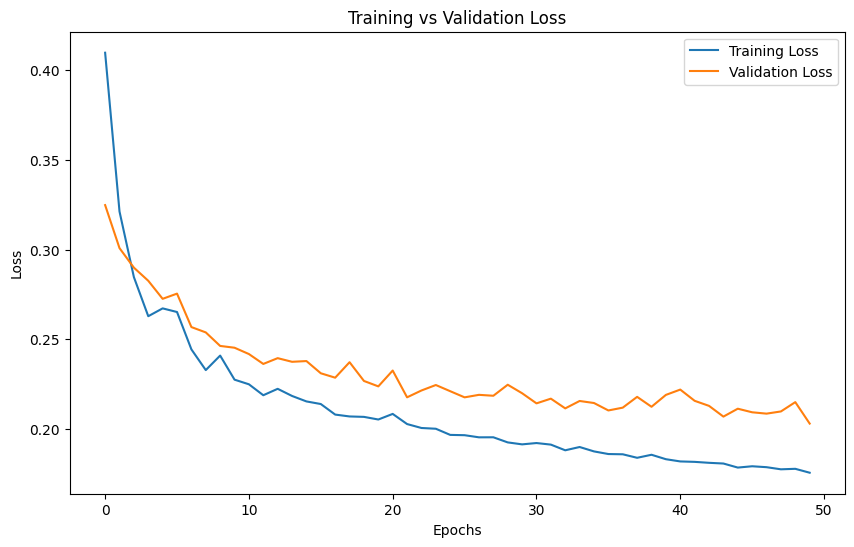

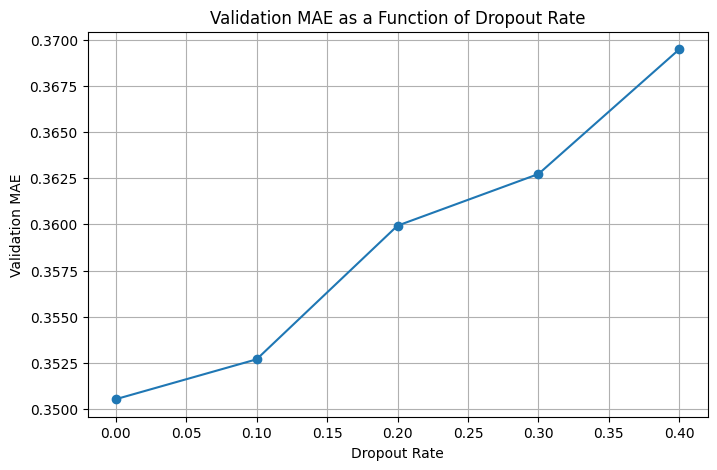

In [13]:
# Hyperparameter search

#Function
def create_model(learning_rate, neurons, dropout_rate, activation):
    model = models.Sequential([
        layers.Dense(neurons, activation=activation, input_shape=(X_train_normalized.shape[1],)),
        layers.Dropout(dropout_rate),
        layers.Dense(neurons, activation=activation),
        layers.Dense(1)
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# Reduced hyperparameter values to iterate over
learning_rates = [0.0001, 0.001]
neurons = [64, 128]
dropout_rates = [0, 0.1, 0.2, 0.3, 0.4]
activations = ['relu', 'tanh']
batch_sizes = [32, 64]
epochs = [10, 20, 50, 100]

# Generate all combinations of hyperparameters
param_combinations = itertools.product(learning_rates, neurons, dropout_rates, activations, batch_sizes, epochs)

# Store results
results = []

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Iterate over each combination of hyperparameters
for params in param_combinations:
    lr, neuron, dropout, activation, batch_size, epoch = params
    print(f"Training model with lr={lr}, neurons={neuron}, dropout={dropout}, activation={activation}, batch_size={batch_size}, epochs={epoch}")
    
    # Create and train the model
    model = create_model(learning_rate=lr, neurons=neuron, dropout_rate=dropout, activation=activation)
    history = model.fit(
        X_train_normalized, y_train_normalized,
        validation_split=0.1,
        epochs=epoch,
        batch_size=batch_size,
        verbose=0,
        callbacks=[early_stopping]
    )
    
    # validation loss and MAE
    val_loss = history.history['val_loss'][-1]
    val_mae = history.history['val_mae'][-1]
    
    # Store the results
    results.append({
        'lr': lr,
        'neurons': neuron,
        'dropout': dropout,
        'activation': activation,
        'batch_size': batch_size,
        'epochs': epoch,
        'val_loss': val_loss,
        'val_mae': val_mae
    })

# Find the best hyperparameters based on validation MAE
best_result = min(results, key=lambda x: x['val_mae'])
print("Best Hyperparameters:", best_result)

# Evaluate the best model on the test set
best_model = create_model(
    learning_rate=best_result['lr'],
    neurons=best_result['neurons'],
    dropout_rate=best_result['dropout'],
    activation=best_result['activation']
)
history = best_model.fit(
    X_train_normalized, y_train_normalized,
    validation_split=0.1,
    epochs=best_result['epochs'],
    batch_size=best_result['batch_size'],
    verbose=0
)

# Test the best model
test_loss, test_mae = best_model.evaluate(X_test_normalized, y_test_normalized, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Plot the loss and MAE for the best model
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot MAE or Validation Loss as a function of the dropout rate
dropout_mae = {}
for result in results:
    dropout = result['dropout']
    mae = result['val_mae']
    if dropout not in dropout_mae:
        dropout_mae[dropout] = []
    dropout_mae[dropout].append(mae)

# Compute the average MAE for each dropout rate
dropout_avg_mae = {key: np.mean(values) for key, values in dropout_mae.items()}

# Plot
plt.figure(figsize=(8, 5))
plt.plot(list(dropout_avg_mae.keys()), list(dropout_avg_mae.values()), marker='o')
plt.title('Validation MAE as a Function of Dropout Rate')
plt.xlabel('Dropout Rate')
plt.ylabel('Validation MAE')
plt.grid()
plt.show()


Best Hyperparameters:
- lr = 0.001
- neurons = 128
- dropout = 0.1
- activation = relu
- batch size = 64
- epochs = 50
- val_loss = 0.20721088349819183
- val_mae = 0.3018903434276581

Epoch 1/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5104 - mae: 0.5209 - val_loss: 0.3260 - val_mae: 0.4028
Epoch 2/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3404 - mae: 0.4084 - val_loss: 0.3655 - val_mae: 0.4385
Epoch 3/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2959 - mae: 0.3852 - val_loss: 0.2934 - val_mae: 0.3800
Epoch 4/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2614 - mae: 0.3615 - val_loss: 0.2819 - val_mae: 0.3734
Epoch 5/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2550 - mae: 0.3553 - val_loss: 0.2594 - val_mae: 0.3535
Epoch 6/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2496 - mae: 0.3502 - val_loss: 0.2552 - val_mae: 0.3529
Epoch 7/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2456 - mae: 0.3409 - val_loss: 0.2501 - val_mae: 0.3383
Epoch 8/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2634 - mae: 0.3404 - val_loss: 0.2534 - val_mae: 0.3418
Epoch 9/50
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

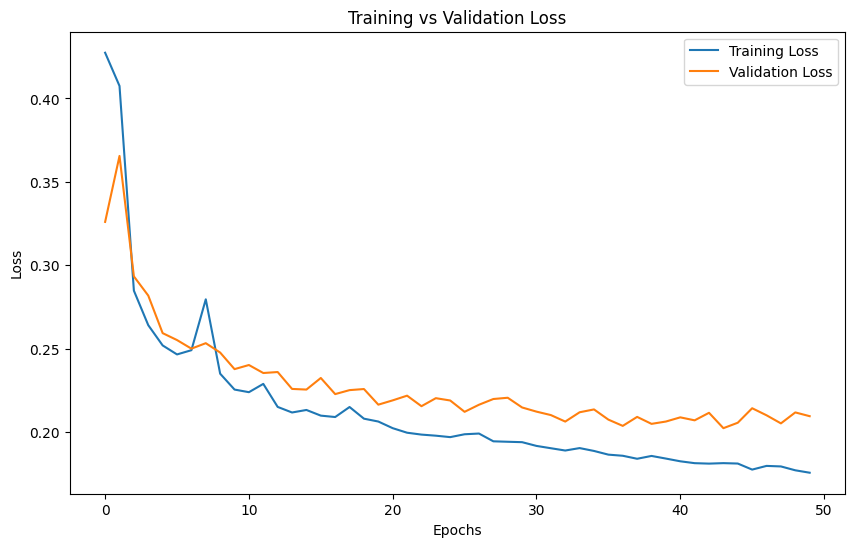

In [16]:
# Best Hyperparameters

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


history = model.fit(
    X_train_normalized, y_train_normalized,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test_normalized, y_test_normalized, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Plotting the loss function (training and validation)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()